In [ ]:
# MobileNet transfer learning for sign language digit detection

In [9]:
# List of imports
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import cv2 
import os
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix

import itertools
import shutil
import random
%matplotlib inline

In [10]:
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

In [ ]:
# TO DO:
# 150 images for thumbs-up (can be with human body or not)
# flow from directory : handles preprocessing
# test difficult data like a hand with 8 fingers or a hand with a glove

In [ ]:
# resize all images to target size
# preprocessing
# .png and .jpeg files are read in as same
# .gif files only take in FIRST image

In [11]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path, target_size=(224,224), batch_size=10)

Found 16117 images belonging to 11 classes.


In [13]:
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path, target_size=(224,224), batch_size=10)

Found 330 images belonging to 11 classes.


In [6]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=10, shuffle=False)
# Found 59 images belonging to 11 classes.
# Change from 55 to 59

Found 59 images belonging to 11 classes.


In [15]:
# Assert number of images to what we expect
assert train_batches.n == 16117
assert valid_batches.n == 330
assert test_batches.n == 59
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 11

In [16]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [17]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [18]:
x = mobile.layers[-6].output
predictions = Dense(11, activation='softmax')(x)
model = Model(mobile.input, predictions)

In [19]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [ ]:
# Suggestion: global pooling, dense, dense
# dense layer before output layer

In [26]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [ ]:
# Suggestion: from layers 21 forward
# for layer in model.layers[-21:]:
#     layer.trainable = True

In [26]:
# 89 layers
len(model.layers)

89

In [27]:
89-23

66

In [ ]:
# layers 0 thru 23 will be false trainable; layers 24 and over will be True trainable
for i, layer in enumerate(model.layers):
    layer.trainable = (i > 66)

In [ ]:
# release every 2 layers, do 10 epochs each
# iterate
for i, layer in enumerate(model.layers):
    layer.trainable = (i > 64)

In [ ]:
# move up stack to enhance training
for i, layer in enumerate(model.layers):
    layer.trainable = (i > 62)

In [27]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

### Train the model

In [ ]:
# Release two more layers for training

In [29]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# fit_generator (deprecated)
# history = model.fit_generator(train_batches, steps_per_epoch=18, validation_data=valid_batches, validation_steps=3, epochs=60, verbose=2)
# Speed Time: 7m 25.02s
# history = model.fit(train_batches, steps_per_epoch=18, validation_data=valid_batches, validation_steps=3, epochs=6, verbose=2)

Epoch 1/6
18/18 - 12s - loss: 2.5027 - accuracy: 0.2333 - val_loss: 3.1237 - val_accuracy: 0.2000
Epoch 2/6
18/18 - 12s - loss: 1.6157 - accuracy: 0.4889 - val_loss: 2.6326 - val_accuracy: 0.1333
Epoch 3/6
18/18 - 11s - loss: 1.2246 - accuracy: 0.6444 - val_loss: 1.4130 - val_accuracy: 0.4667
Epoch 4/6
18/18 - 13s - loss: 0.9839 - accuracy: 0.7444 - val_loss: 1.2058 - val_accuracy: 0.5333
Epoch 5/6
18/18 - 15s - loss: 0.8045 - accuracy: 0.7556 - val_loss: 1.2458 - val_accuracy: 0.5333
Epoch 6/6
18/18 - 16s - loss: 0.7116 - accuracy: 0.8056 - val_loss: 0.9638 - val_accuracy: 0.7000


In [ ]:
# Future: LSTM, time series data, RNN, language model


In [30]:
# Return dictionary of history of validation loss and accuracy
history.history

{'loss': [0.33437028527259827,
  0.2527093291282654,
  0.2756991982460022,
  0.2369363158941269,
  0.31103914976119995,
  0.23507905006408691],
 'accuracy': [0.9166666865348816,
  0.949999988079071,
  0.9277777671813965,
  0.9388889074325562,
  0.9277777671813965,
  0.9444444179534912],
 'val_loss': [0.2679804265499115,
  0.23545747995376587,
  0.22275744378566742,
  0.33110180497169495,
  0.0997711792588234,
  0.13430172204971313],
 'val_accuracy': [0.8666666746139526,
  0.9333333373069763,
  0.9333333373069763,
  0.8666666746139526,
  1.0,
  0.9666666388511658]}

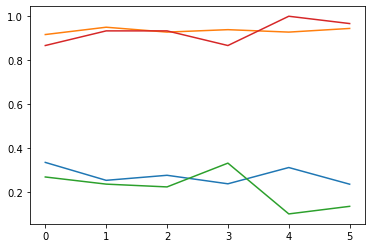

In [33]:
# Plot validation loss and accuracy scores
# 6 epochs VS. 60 epochs
for k,v in history.history.items():
    plt.plot(v)
    

In [ ]:
# 60 epochs, release 2 layers, train for another 60 epochs, show the plot, release layers to make trainable
# incrementally, replace transfer learning with your own learning
# expected: diminishing returns

In [ ]:
# Conv3D
# video data VS. still images